# Exploratory Analysis

1. How many targets are non-zero? 
2. What `features` can we work with? What's going on there?
2. What's the deal with `weights`? 
2. What's the deal with `seeds` and `batch_idxs`? 
1. What is the temporal evolution of features?
2. What happens when a collision occurs?

No models were harmed in this notebook.

In [1]:
import h5py
import numpy as np
import pandas as pd
import time
import xarray as xr

import matplotlib.pyplot as plt
plt.style.use('classic') #old-school
%matplotlib inline

In [2]:
data_path = '../../data/datasets/bn_aug_5_sec_10_timestep.h5'
f = h5py.File(data_path)

In [3]:
f.visit(lambda x: print(x))

risk
risk/features
risk/weights
risk/targets
risk/seeds
risk/batch_idxs


In [4]:
# Can't access any string attributes due to a bug in h5py
for attribute in sorted(f['risk'].attrs):
    print(attribute)
    try:
        print(str(f['risk'].attrs[attribute]))
    except Exception: 
        pass
    print('')

NGSIM_i101_set
1

NGSIM_max_num_vehicles
193

NGSIM_num_resets
1000

NGSIM_prime_time
1.0

base_bn_filepath

behavior_type

bootstrap_discount
1.0

chunk_dim
100

dataset_type

debug_fore_sigma
0.0

debug_hi_delta_s
10.0

debug_hi_v_fore
0.0

debug_hi_v_rear
0.0

debug_lo_delta_s
0.0

debug_lo_v_fore
0.0

debug_lo_v_rear
0.0

debug_rear_sigma
0.0

debug_s_eps
1e-08

debug_v_eps
1e-08

driver_network_filepath

err_p_a_to_i
0.01

err_p_i_to_a
0.3

evaluator_type

extract_behavioral

extract_car_lidar

extract_car_lidar_range_rate

extract_core

extract_neighbor

extract_neighbor_behavioral

extract_road_lidar

extract_temporal

extract_well_behaved

extractor_type

feature_names
['relative_offset' 'relative_heading' 'velocity' 'length' 'width'
 'lane_curvature' 'markerdist_left' 'markerdist_right' 'accel' 'jerk'
 'turn_rate_global' 'angular_rate_global' 'turn_rate_frenet'
 'angular_rate_frenet' 'timegap' 'timegap_is_avail' 'time_to_collision'
 'time_to_collision_is_avail' 'is_colliding' 

In [5]:
feature_names = f['risk'].attrs['feature_names'].ravel()
sorted(feature_names)

['accel',
 'angular_rate_frenet',
 'angular_rate_global',
 'fore_fore_m_accel',
 'fore_fore_m_dist',
 'fore_fore_m_is_avail',
 'fore_fore_m_jerk',
 'fore_fore_m_vel',
 'fore_l_accel',
 'fore_l_dist',
 'fore_l_is_avail',
 'fore_l_jerk',
 'fore_l_vel',
 'fore_m_accel',
 'fore_m_dist',
 'fore_m_is_avail',
 'fore_m_jerk',
 'fore_m_vel',
 'fore_r_accel',
 'fore_r_dist',
 'fore_r_is_avail',
 'fore_r_jerk',
 'fore_r_vel',
 'is_colliding',
 'jerk',
 'lane_curvature',
 'lane_offset_left',
 'lane_offset_left_is_avail',
 'lane_offset_right',
 'lane_offset_right_is_avail',
 'length',
 'lidar_1',
 'lidar_10',
 'lidar_11',
 'lidar_12',
 'lidar_13',
 'lidar_14',
 'lidar_15',
 'lidar_16',
 'lidar_17',
 'lidar_18',
 'lidar_19',
 'lidar_2',
 'lidar_20',
 'lidar_3',
 'lidar_4',
 'lidar_5',
 'lidar_6',
 'lidar_7',
 'lidar_8',
 'lidar_9',
 'markerdist_left',
 'markerdist_right',
 'negative_velocity',
 'out_of_lane',
 'rangerate_lidar_1',
 'rangerate_lidar_10',
 'rangerate_lidar_11',
 'rangerate_lidar_12',


In [6]:
len(feature_names)

100

In [7]:
f['risk/features']

<HDF5 dataset "features": shape (152500, 10, 100), type "<f8">

In [8]:
bn_data_array = xr.DataArray(
    data=f['risk/features'][:], 
    coords={'features': feature_names},
    dims=('samples', 'timesteps', 'features')
)

In [9]:
# Collect first 20 samples and summarize how each sample evolves over time (timesteps)
(bn_data_array
     .loc[:12,:, 'time_to_collision']
     .transpose()
     .to_pandas()
     .describe()
)

samples,0,1,2,3,4,5,6,7,8,9,10,11
count,10.0,10.00000,10.0,10.000000,10.0,10.0,1.000000e+01,10.0,10.0,1.000000e+01,10.0,10.000000
mean,0.0,46.27892,30.0,11.689297,30.0,30.0,2.394274e+00,30.0,30.0,3.164584e+00,30.0,6.087184
std,0.0,0.00000,0.0,0.000000,0.0,0.0,4.681111e-16,0.0,0.0,4.681111e-16,0.0,0.000000
min,0.0,46.27892,30.0,11.689297,30.0,30.0,2.394274e+00,30.0,30.0,3.164584e+00,30.0,6.087184
25%,0.0,46.27892,30.0,11.689297,30.0,30.0,2.394274e+00,30.0,30.0,3.164584e+00,30.0,6.087184
50%,0.0,46.27892,30.0,11.689297,30.0,30.0,2.394274e+00,30.0,30.0,3.164584e+00,30.0,6.087184
75%,0.0,46.27892,30.0,11.689297,30.0,30.0,2.394274e+00,30.0,30.0,3.164584e+00,30.0,6.087184
max,0.0,46.27892,30.0,11.689297,30.0,30.0,2.394274e+00,30.0,30.0,3.164584e+00,30.0,6.087184


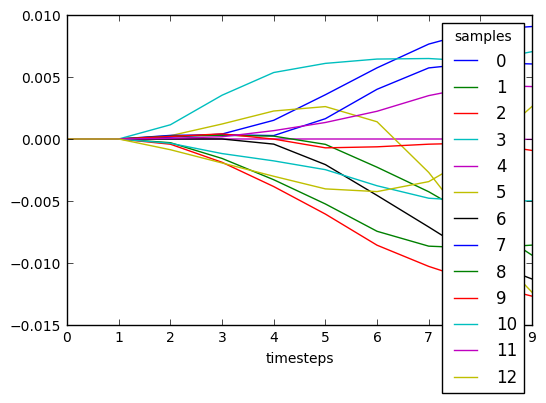

In [10]:
(bn_data_array
     .loc[:13,:, 'relative_offset']
     .transpose()
     .to_pandas()
     .plot()
)

## Acceleration Plots

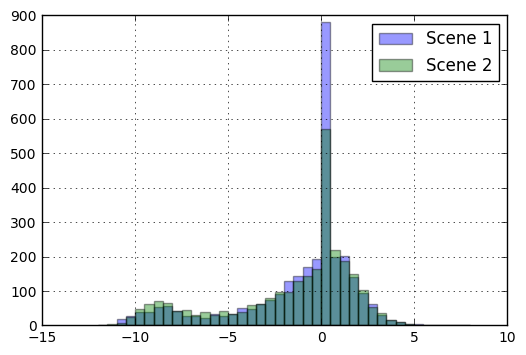

In [11]:
(bn_data_array
     .loc[:305,:, 'accel']
     .transpose()
     .to_series()
     .hist(bins=40, range=(-12,8), alpha=0.4, label='Scene 1')
)
(bn_data_array
     .loc[305:610,:, 'accel']
     .transpose()
     .to_series()
     .hist(bins=40, range=(-12,8), alpha=0.4, label='Scene 2')
)
plt.legend()

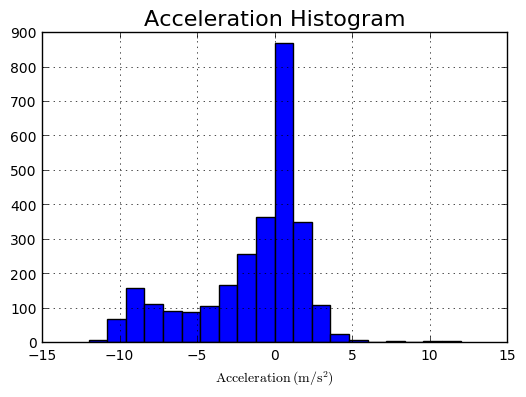

In [12]:
# TeX text rendering works but I'm hesisitant to use it too heavily
# Docs here https://matplotlib.org/users/usetex.html
(bn_data_array
     .loc[305:610,:, 'accel']
     .transpose()
     .to_series()
     .hist(bins=20, range=(-12,12))
)
plt.title('Acceleration Histogram', fontsize=16)
plt.xlabel(r'$\mathrm{Acceleration}\, (\mathrm{m}/\mathrm{s}^2)$')

## Lots of plots

In [13]:
def plot_columns(sample, columns, xlabel='Distance (m)'):
    plt.figure(figsize=(10, 7))
    for col in columns:
        plt.plot(np.linspace(start=0, stop=5, num=10),
        bn_data_array.loc[sample,:,col],
        label=col)

    plt.xlabel('Time (sec)')
    plt.ylabel(xlabel)
    plt.legend(loc='upper right', 
               bbox_to_anchor=(1.25, 1))

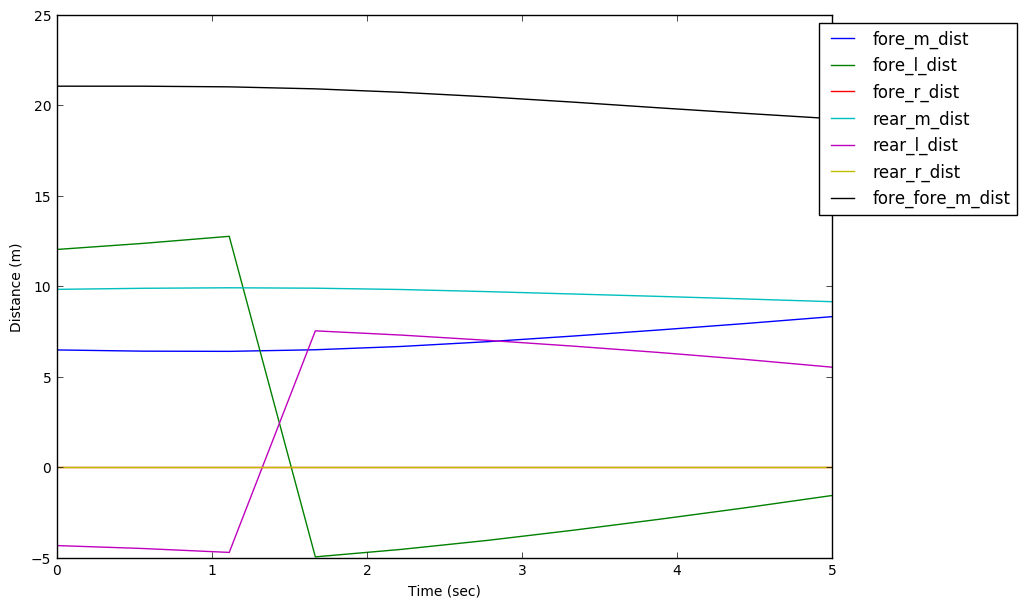

In [14]:
plot_columns(
    sample=10,
    columns=['fore_m_dist',
            'fore_l_dist',
            'fore_r_dist',
            'rear_m_dist',
            'rear_l_dist',
            'rear_r_dist',
            'fore_fore_m_dist']
)

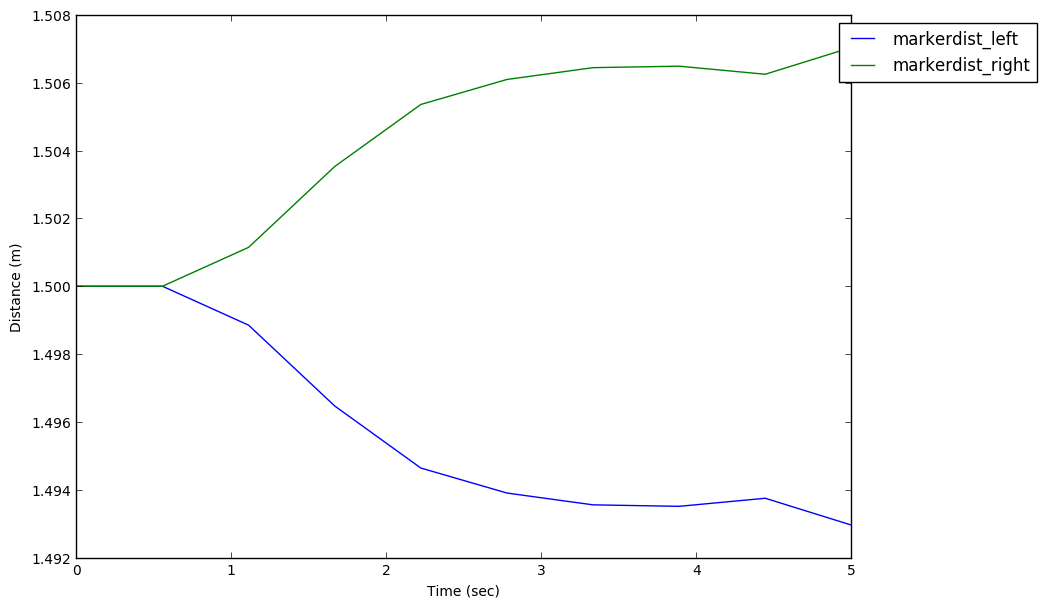

In [15]:
plot_columns(
    sample=3,        
    columns=['markerdist_left',
             'markerdist_right',]
)

In [16]:
lidar_cols = [c for c in feature_names if 'lidar' in c and 'rangerate' not in c]
lidar_cols

['lidar_1',
 'lidar_2',
 'lidar_3',
 'lidar_4',
 'lidar_5',
 'lidar_6',
 'lidar_7',
 'lidar_8',
 'lidar_9',
 'lidar_10',
 'lidar_11',
 'lidar_12',
 'lidar_13',
 'lidar_14',
 'lidar_15',
 'lidar_16',
 'lidar_17',
 'lidar_18',
 'lidar_19',
 'lidar_20']

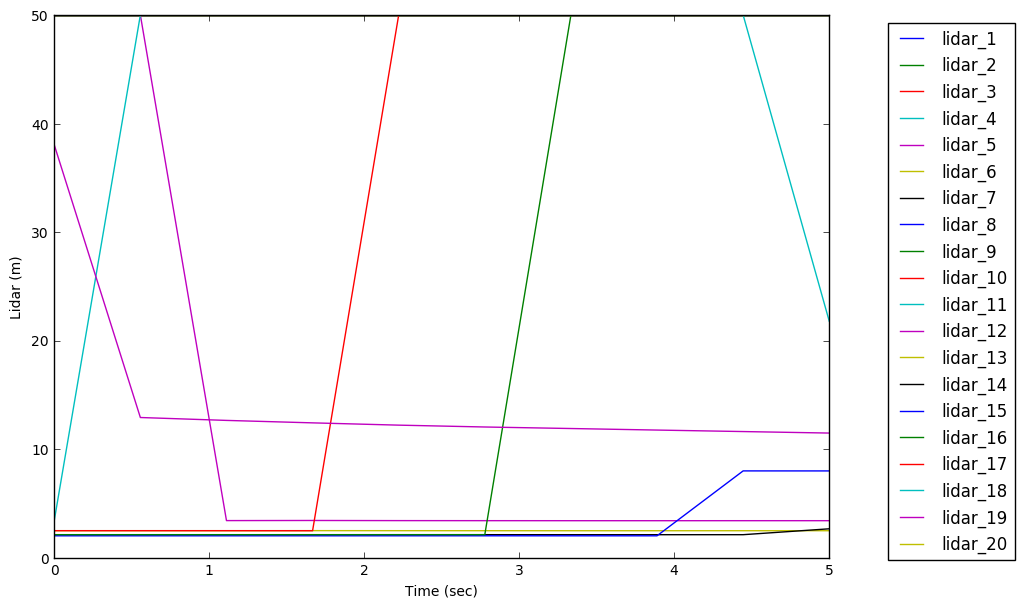

In [17]:
plot_columns(
    sample=0,    
    columns=lidar_cols,     
    xlabel='Lidar (m)'
)

In [18]:
range_rate_cols = [c for c in feature_names if 'rangerate' in c]
range_rate_cols

['rangerate_lidar_1',
 'rangerate_lidar_2',
 'rangerate_lidar_3',
 'rangerate_lidar_4',
 'rangerate_lidar_5',
 'rangerate_lidar_6',
 'rangerate_lidar_7',
 'rangerate_lidar_8',
 'rangerate_lidar_9',
 'rangerate_lidar_10',
 'rangerate_lidar_11',
 'rangerate_lidar_12',
 'rangerate_lidar_13',
 'rangerate_lidar_14',
 'rangerate_lidar_15',
 'rangerate_lidar_16',
 'rangerate_lidar_17',
 'rangerate_lidar_18',
 'rangerate_lidar_19',
 'rangerate_lidar_20']

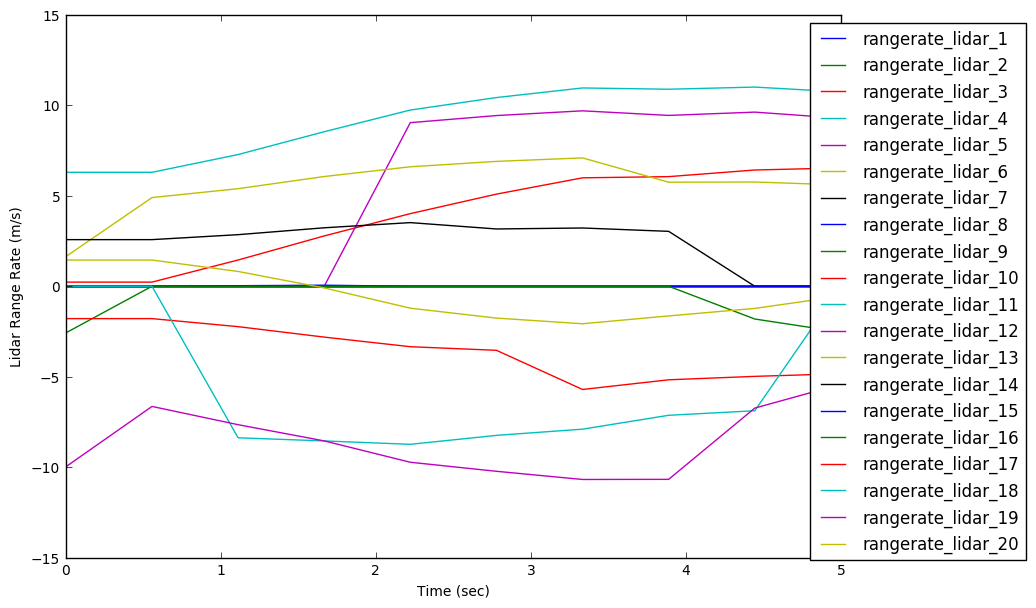

In [19]:
plot_columns(
    sample=2,
    columns=range_rate_cols,
    xlabel='Lidar Range Rate (m/s)'       
)